In [2]:
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout ,ZeroPadding2D , Conv2DTranspose, AveragePooling2D,UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

import cv2
from keras.layers import Input
from keras.models import Model

اتصال به گوگل درایو برای خواندن دیتاست


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ls

خواندن دیتاست

In [3]:
labels = ["Ak", "Ala_Idris", "Buzgulu", "Dimnit", "Nazli"]
img_size = 70
Ak = []
Ala_Idris = []
Buzgulu = []
Dimnit = []
Nazli = []

AK_original = []
Ala_Idris_original = []
Buzgulu_original = []
Dimnit_original = []
Nazli_original = []
j = -1
for label_name in labels :
    j += 1
    
    for i in range(100) :
            print(i , end=" ")
            path = "gdrive/MyDrive/DataSet/" + label_name + '/' + label_name + " (" + str(i+1) + ").png"
            img = cv2.imread(path, cv2.IMREAD_COLOR)

            img2 = cv2.resize(img, (img_size, img_size))
            
            if j==0:
                AK_original.append(img)
                Ak.append(img2)
            elif j==1:
                Ala_Idris_original.append(img)
                Ala_Idris.append(img2)
            elif j==2:
                Buzgulu_original.append(img)
                Buzgulu.append(img2)
            elif j==3 :
                Dimnit_original.append(img)
                Dimnit.append(img2)
            elif j==4:
                Nazli_original.append(img)
                Nazli.append(img2)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46

##make numpy array

In [4]:
Ak = np.array(Ak)
Ala_Idris = np.array(Ala_Idris)
Buzgulu = np.array(Buzgulu)
Dimnit = np.array(Dimnit)
Nazli = np.array(Nazli)


Ak.shape


(100, 70, 70, 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

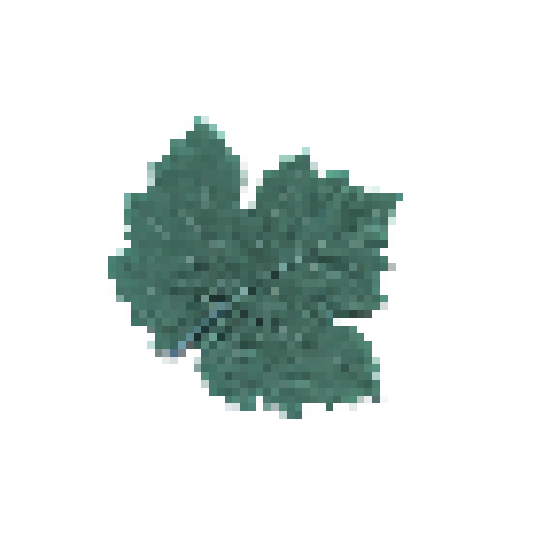

In [5]:
Ak[5]
fig  = plt.figure(figsize=(15, 10))
plt.imshow(Ak[5])
plt.axis("off")
Ak[5]

In [6]:
Ak = np.array(Ak)
Ala_Idris = np.array(Ala_Idris)
Buzgulu = np.array(Buzgulu)
Dimnit = np.array(Dimnit)
Nazli = np.array(Nazli)


Ak.shape


(100, 70, 70, 3)

## split data so train and test set

In [7]:
Ak_train = Ak[0:80]
Ala_Idris_train = Ala_Idris[0:80]
Buzgulu_train = Buzgulu[0:80]
Dimnit_train = Dimnit[0:80]
Nazli_train = Nazli[0:80]


Ak_test = Ak[80:]
Ala_Idris_test = Ala_Idris[80:]
Buzgulu_test = Buzgulu[80:]
Dimnit_test = Dimnit[80:]
Nazli_test = Nazli[80:]

Ak_test.shape


(20, 70, 70, 3)

# data augmentation

In [8]:
datagen1 = ImageDataGenerator(horizontal_flip=True)
datagen2 = ImageDataGenerator(rotation_range=90)
datagen3 = ImageDataGenerator(zoom_range=[0.5,1.0])
datagen4 = ImageDataGenerator(brightness_range=[0.2,1.0])
datagen5 = ImageDataGenerator(width_shift_range=[-200,200])
datagen6 = ImageDataGenerator(height_shift_range=0.5)

itHori1 = datagen1.flow(Ak_test, batch_size=1)
itRot1 = datagen2.flow(Ak_test, batch_size=1)
itZoom1 = datagen3.flow(Ak_test, batch_size=1)
itBright1 = datagen4.flow(Ak_test, batch_size=1)
itWshift1 = datagen5.flow(Ak_test, batch_size=1)
itHshift1 = datagen6.flow(Ak_test, batch_size=1)

itHori2 = datagen1.flow(Ala_Idris_train, batch_size=1)
itRot2 = datagen2.flow(Ala_Idris_train, batch_size=1)
itZoom2 = datagen3.flow(Ala_Idris_train, batch_size=1)
itBright2 = datagen4.flow(Ala_Idris_train, batch_size=1)
itWshift2 = datagen5.flow(Ala_Idris_train, batch_size=1)
itHshift2 = datagen6.flow(Ala_Idris_train, batch_size=1)

itHori3 = datagen1.flow(Buzgulu_train, batch_size=1)
itRot3 = datagen2.flow(Buzgulu_train, batch_size=1)
itZoom3 = datagen3.flow(Buzgulu_train, batch_size=1)
itBright3 = datagen4.flow(Buzgulu_train, batch_size=1)
itWshift3 = datagen5.flow(Buzgulu_train, batch_size=1)
itHshift3 = datagen6.flow(Buzgulu_train, batch_size=1)

itHori4 = datagen1.flow(Dimnit_train, batch_size=1)
itRot4 = datagen2.flow(Dimnit_train, batch_size=1)
itZoom4 = datagen3.flow(Dimnit_train, batch_size=1)
itBright4 = datagen4.flow(Dimnit_train, batch_size=1)
itWshift4 = datagen5.flow(Dimnit_train, batch_size=1)
itHshift4 = datagen6.flow(Dimnit_train, batch_size=1)

itHori5 = datagen1.flow(Nazli_train, batch_size=1)
itRot5 = datagen2.flow(Nazli_train, batch_size=1)
itZoom5 = datagen3.flow(Nazli_train, batch_size=1)
itBright5 = datagen4.flow(Nazli_train, batch_size=1)
itWshift5 = datagen5.flow(Nazli_train, batch_size=1)
itHshift5 = datagen6.flow(Nazli_train, batch_size=1)


In [ ]:



for i in range (70):
    
    imageHori1 = itHori1.next()[0].astype('uint8')
    imageRot1 = itRot1.next()[0].astype('uint8')
    imageZoom1 = itZoom1.next()[0].astype('uint8')
    imageBright1 = itBright1.next()[0].astype('uint8')
    imageWshift1 = itWshift1.next()[0].astype('uint8')
    imageHshift1 = itHshift1.next()[0].astype('uint8')

    imageHori2 = itHori2.next()[0].astype('uint8') 
    imageRot2 = itRot2.next()[0].astype('uint8')
    imageZoom2 = itZoom2.next()[0].astype('uint8')
    imageBright2 = itBright2.next()[0].astype('uint8')
    imageWshift2 = itWshift2.next()[0].astype('uint8')
    imageHshift2 = itHshift2.next()[0].astype('uint8')

    imageHori3 = itHori3.next()[0].astype('uint8')
    imageRot3 = itRot3.next()[0].astype('uint8')
    imageZoom3 = itZoom3.next()[0].astype('uint8')
    imageBright3 = itBright3.next()[0].astype('uint8')
    imageWshift3 = itWshift3.next()[0].astype('uint8')
    imageHshift3 = itHshift3.next()[0].astype('uint8')

    imageHori4 = itHori4.next()[0].astype('uint8')
    imageRot4 = itRot4.next()[0].astype('uint8')
    imageZoom4 = itZoom4.next()[0].astype('uint8')
    imageBright4 = itBright4.next()[0].astype('uint8')
    imageWshift4 = itWshift4.next()[0].astype('uint8')
    imageHshift4 = itHshift4.next()[0].astype('uint8')

    imageHori5 = itHori5.next()[0].astype('uint8')
    imageRot5 = itRot5.next()[0].astype('uint8')
    imageZoom5 = itZoom5.next()[0].astype('uint8')
    imageBright5 = itBright5.next()[0].astype('uint8')
    imageWshift5 = itWshift5.next()[0].astype('uint8')
    imageHshift5 = itHshift5.next()[0].astype('uint8')

    Ak_train = np.append([Ak_train],[imageHori1])
    Ak_train = np.append([Ak_train],[imageRot1])
    Ak_train = np.append([Ak_train],[imageZoom1])
    Ak_train = np.append([Ak_train],[imageBright1])
    Ak_train = np.append([Ak_train],[imageWshift1])
    Ak_train = np.append([Ak_train],[imageHshift1])

    Ala_Idris_train = np.append([Ala_Idris_train], [imageHori2])
    Ala_Idris_train = np.append([Ala_Idris_train], [imageRot2])
    Ala_Idris_train = np.append([Ala_Idris_train], [imageZoom2])
    Ala_Idris_train = np.append([Ala_Idris_train], [imageBright2])
    Ala_Idris_train = np.append([Ala_Idris_train], [imageWshift2])
    Ala_Idris_train = np.append([Ala_Idris_train], [imageHshift2])

    Buzgulu_train = np.append([Buzgulu_train], [imageHori3])
    Buzgulu_train = np.append([Buzgulu_train], [imageRot3])
    Buzgulu_train = np.append([Buzgulu_train], [imageZoom3])
    Buzgulu_train = np.append([Buzgulu_train], [imageBright3])
    Buzgulu_train = np.append([Buzgulu_train], [imageWshift3])
    Buzgulu_train = np.append([Buzgulu_train], [imageHshift3])

    Dimnit_train = np.append([Dimnit_train], [imageHori4])
    Dimnit_train = np.append([Dimnit_train], [imageRot4])
    Dimnit_train = np.append([Dimnit_train], [imageZoom4])
    Dimnit_train = np.append([Dimnit_train], [imageBright4])
    Dimnit_train = np.append([Dimnit_train], [imageWshift4])
    Dimnit_train = np.append([Dimnit_train], [imageHshift4])

    Nazli_train = np.append([Nazli_train] , [imageHori5])
    Nazli_train = np.append([Nazli_train] , [imageRot5])
    Nazli_train = np.append([Nazli_train] , [imageZoom5])
    Nazli_train = np.append([Nazli_train] , [imageBright5])
    Nazli_train = np.append([Nazli_train] , [imageWshift5])
    Nazli_train = np.append([Nazli_train] , [imageHshift5])

    print(i)

In [10]:
img_count = Ak_train.shape[0] / (img_size*img_size*3)
img_count = int(img_count)
img_count

3080

## reshape data to matrix

In [11]:
Ak_train= Ak_train.reshape(img_count,img_size,img_size,3)
Ala_Idris_train= Ala_Idris_train.reshape(img_count,img_size,img_size,3)
Buzgulu_train= Buzgulu_train.reshape(img_count,img_size,img_size,3)
Dimnit_train= Dimnit_train.reshape(img_count,img_size,img_size,3)
Nazli_train= Nazli_train.reshape(img_count,img_size,img_size,3)





In [12]:
print(39984000  /(140*140*3))
Ak_train.shape

680.0


(3080, 70, 70, 3)

## split train set to train and validation set

In [13]:
Ak_train.shape
msk = np.random.rand(len(Ak_train)) < 0.8

Ak_Validation = Ak_train[~msk]
Ak_train = Ak_train[msk]

Ala_Idris_Validation = Ala_Idris_train[~msk]
Ala_Idris_train = Ala_Idris_train[msk]

Buzgulu_Validation = Buzgulu_train[~msk]
Buzgulu_train = Buzgulu_train[msk]

Dimnit_Validation = Dimnit_train[~msk]
Dimnit_train = Dimnit_train[msk]

Nazli_Validation = Nazli_train[~msk]
Nazli_train = Nazli_train[msk]



In [14]:
def plot_gallery(images, h, w , o, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.05 , wspace = 0.5)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w , o)))
        plt.xticks(())
        plt.yticks(())

In [15]:
X_train = np.append(Ak_train , Ala_Idris_train) # , Buzgulu_train , Dimnit_train , Nazli_train
X_train = np.append(X_train , Buzgulu_train)
X_train = np.append(X_train , Dimnit_train)
X_train = np.append(X_train , Nazli_train)

## plot some pictures. you can see some generated pictures among them.

(12285, 70, 70, 3)

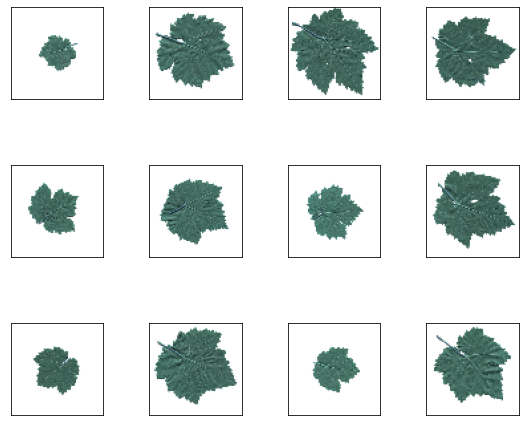

In [16]:
X_train = X_train.reshape(len(Ak_train)*5 , img_size ,img_size ,3)
X_train.shape
plot_gallery(X_train, img_size,img_size ,3 )
X_train.shape

In [17]:
Y_train = []
for i in range(5):
    for j in range (len(Ak_train)):
        Y_train.append(i)
Y_train = np.array(Y_train)
Y_train.shape

(12285,)

In [18]:
X_validation = np.append(Ak_Validation , Ala_Idris_Validation) # , Buzgulu_train , Dimnit_train , Nazli_train
X_validation = np.append(X_validation , Buzgulu_Validation)
X_validation = np.append(X_validation , Dimnit_Validation)
X_validation = np.append(X_validation , Nazli_Validation)

In [19]:
X_validation = X_validation.reshape(len(Ak_Validation)*5 , img_size ,img_size ,3)
X_validation.shape

(3115, 70, 70, 3)

In [20]:
Ala_Idris_test.shape

(20, 70, 70, 3)

In [21]:
X_test = np.append(Ak_test , Ala_Idris_test) # , Buzgulu_train , Dimnit_train , Nazli_train
X_test = np.append(X_test , Buzgulu_test)
X_test = np.append(X_test , Dimnit_test)
X_test = np.append(X_test , Nazli_test)

In [22]:
X_test = X_test.reshape(len(Ak_test)*5 , img_size ,img_size ,3)
X_test.shape

(100, 70, 70, 3)

In [ ]:

print(374100000 /(100*100*3) )


12470.0


In [23]:
Y_test = []
for i in range(5):
    for j in range (len(Ak_test)):
        Y_test.append(i)
Y_test = np.array(Y_test)
Y_test.shape

(100,)

In [24]:
X_train_normal = X_train / 255
X_validation_normal = X_validation / 255
X_test = X_test /255

## add noise to data for train auto encoder denoising

In [ ]:
noise_factor = -0.3
x_train_noisy = X_train_normal + noise_factor * abs(np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) )
x_test_noisy = X_validation_normal + noise_factor * abs( np.random.normal(loc=0.0, scale=1.0, size=X_validation.shape) )



#Auto encoder

اینجا من ترین نمیکنم اینو چون کولب هر بار به لیمیت میرسه و نمیزاره ادامه بدم.
ولی روند و کد درسته.این مدل باید با ایپاک 50 تایی حداقل ترین بشه و یاد بگیره.
و بعدش میام اضافه میکنم این مدل رو به ابتدای مدل سکوانشالم که در ادامه هست.
با اینکار باعث میشم که دیتاهای نویزی هم به دیتاها اضافه بشه. والبته که دینویز میشه توی لایه اول توسط این اوتو انکودر


In [ ]:
def denosing_autoencoder(x_train_normal , x_train_normal_noisy, eps, optimizer, noise):

  model = Sequential()
  # encoder network
  model.add(Conv2D(60, 3, activation= 'relu', padding='same', input_shape = (img_size,img_size,3)))
  model.add(AveragePooling2D(2, padding= 'same'))
  model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
  model.add(AveragePooling2D(2, padding= 'same'))

  # model.add(Dense(512,activation='relu'))
  #decoder network
  model.add(Conv2DTranspose(30, 3, activation= 'relu', padding='same'))
  model.add(UpSampling2D(2))
  model.add(Conv2DTranspose(60, 3, activation= 'relu', padding='same'))
  model.add(UpSampling2D(2))
  model.add(Conv2DTranspose(3,3,activation='sigmoid', padding= 'same')) # output layer
  model.summary()

  
  model.compile(optimizer=optimizer,loss='mse',metrics=['accuracy'])

  # history = model.fit(train_generator, train_generator, validation_split=0.2, epochs=eps)
  # get_accuracy_plot(history)
  # return model 

  for epoch in range(eps):

    history = model.fit(
      x_train_normal_noisy,
      x_train_normal,
      epochs=1, 
      # batch_size=32,
      validation_split=0.10,
      steps_per_epoch=5,
        )   
  # model.evaluate(X_test, y_test)
  model.predict(X_train_normal)
  # fitted_model = model.fit(train, train, validation_split=0.2, epochs=eps)
  # get_accuracy_plot(history)
  return model

In [ ]:

autoencoder = denosing_autoencoder(X_train_normal,x_train_noisy, eps=30, optimizer=Adam(lr=0.001), noise=0.5)

#important about auto encoder
چون ترینش نکردم، داده رو نمیدم بهش و خروجی بگیرم و اضافه کنم به داده های ترینم.
ولی اگه کولب اوکی بود اینکارو میکردم و ازینجا به بعد با مقدار داده دو برابر ادامه میدادم.

> Indented block



In [25]:
Y_validation = []
for i in range(5):
    for j in range (len(Ak_Validation)):
        Y_validation.append(i)
Y_validation = np.array(Y_validation)
Y_validation.shape

(3115,)

In [26]:
tf.keras.backend.clear_session()

In [33]:
model = Sequential([
    ZeroPadding2D(padding=(1,1), input_shape=(img_size,img_size,3)),
    Conv2D(32,3 ,activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    ZeroPadding2D(padding=(1,1)),

    Conv2D(32,3 , activation='relu'),
    #remove max pooling
    ZeroPadding2D(padding=(1,1)),

    Conv2D(64,3 , activation='relu'),
    MaxPool2D(pool_size=2 , strides=2),
    ZeroPadding2D(padding=(1,1)),

    Conv2D(128,3 , activation='relu'),
    MaxPool2D(pool_size=2 , strides=2),


    Flatten(),
    
    Dense(800 , activation='relu'),
    Dense(5 , activation = 'softmax'),
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_4 (ZeroPaddi  (None, 72, 72, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 70, 70, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 zero_padding2d_5 (ZeroPaddi  (None, 37, 37, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_5 (Conv2D)           (None, 35, 35, 32)        9248      
                                                      

In [35]:
model.compile('adam' , loss='categorical_crossentropy' , metrics = ['accuracy'])

In [36]:
Y_train_ohe = to_categorical(Y_train)
Y_validation_ohe = to_categorical (Y_validation)
Y_test_ohe = to_categorical (Y_test)

In [37]:
Y_train_ohe

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [38]:
history = model.fit(X_train_normal , Y_train_ohe , epochs=30 , validation_data= (X_validation_normal , Y_validation_ohe) )

Epoch 1/30
384/384 [==============================] - 6s 13ms/step - loss: 1.4855 - accuracy: 0.3175 - val_loss: 1.1134 - val_accuracy: 0.5490
Epoch 2/30
384/384 [==============================] - 5s 12ms/step - loss: 0.8482 - accuracy: 0.6595 - val_loss: 0.7040 - val_accuracy: 0.7059
Epoch 3/30
384/384 [==============================] - 5s 12ms/step - loss: 0.4906 - accuracy: 0.7914 - val_loss: 0.5970 - val_accuracy: 0.7525
Epoch 4/30
384/384 [==============================] - 5s 12ms/step - loss: 0.3441 - accuracy: 0.8406 - val_loss: 0.6659 - val_accuracy: 0.7496
Epoch 5/30
384/384 [==============================] - 5s 12ms/step - loss: 0.3035 - accuracy: 0.8567 - val_loss: 0.6599 - val_accuracy: 0.7711
Epoch 6/30
384/384 [==============================] - 5s 12ms/step - loss: 0.2926 - accuracy: 0.8606 - val_loss: 0.7351 - val_accuracy: 0.7570
Epoch 7/30
384/384 [==============================] - 6s 16ms/step - loss: 0.2903 - accuracy: 0.8603 - val_loss: 0.7340 - val_accuracy: 0.7650

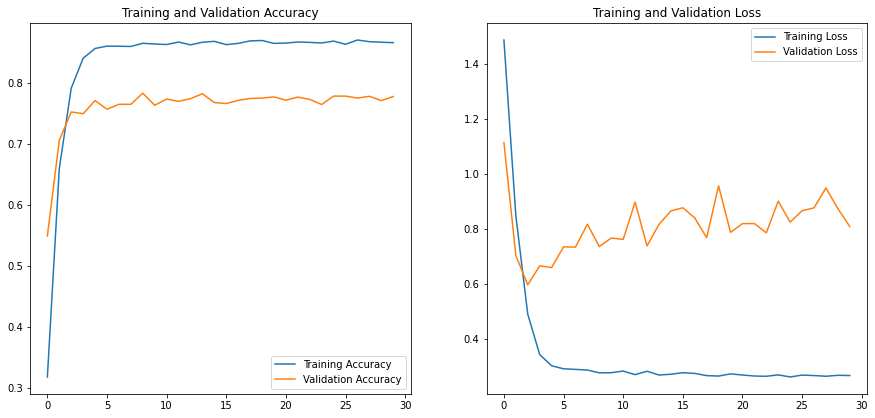

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
CNN_model_predict = model.predict(X_test)

In [41]:
X_test.shape

(100, 70, 70, 3)

In [42]:
Y_test.shape

(100,)

In [43]:
test_cnn_loss, test_cnn_acc = model.evaluate(X_test, Y_test_ohe, verbose = 2)
print("\nTest accuracy : ", test_cnn_acc, " Test loss : ", test_cnn_loss)

4/4 - 0s - loss: 1.6952 - accuracy: 0.7700 - 36ms/epoch - 9ms/step

Test accuracy :  0.7699999809265137  Test loss :  1.6951605081558228


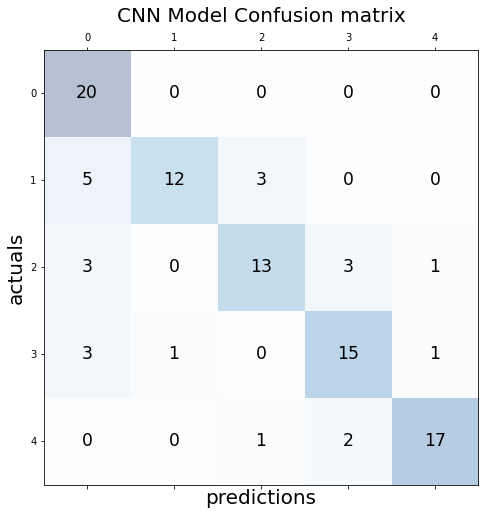

In [44]:
import sklearn
cnn_y_pred = np.argmax(CNN_model_predict, axis=1)
cnn_y_test = Y_test

confusion_matrix_cnn = sklearn.metrics.confusion_matrix(y_pred = cnn_y_pred, y_true = cnn_y_test)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(confusion_matrix_cnn, cmap=plt.cm.Blues, alpha=.3)
for i in range(confusion_matrix_cnn.shape[0]):
  for j in range(confusion_matrix_cnn.shape[1]):
    ax.text(x=j, y=i, s = confusion_matrix_cnn[i, j], va="center", ha="center", size = "xx-large")
plt.xlabel("predictions", fontsize=20)
plt.ylabel("actuals", fontsize=20)
plt.title("CNN Model Confusion matrix", fontsize = 20)
plt.show()

# accuracy , precision , recall , f1-score

میبنیم که همه ی مقادیر قابل اتقا هستند و مدل به خوبی عمل کرده است

In [ ]:
print(classification_report(cnn_y_test, cnn_y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        20
           1       0.88      0.70      0.78        20
           2       0.71      0.85      0.77        20
           3       0.82      0.45      0.58        20
           4       0.74      0.85      0.79        20

    accuracy                           0.77       100
   macro avg       0.78      0.77      0.76       100
weighted avg       0.78      0.77      0.76       100



# ResNet50

In [ ]:
base_model =  keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(img_size,img_size,3),
    pooling=None,
    classes=1000,
)


In [ ]:
base_model.trainable = False


In [ ]:
model2 = Sequential([
   base_model,

    Flatten(),
        
    Dense(700 , activation='relu'),

    Dense(5 , activation = 'softmax'),
])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 700)               12903100  
                                                                 
 dense_7 (Dense)             (None, 5)                 3505      
                                                                 
Total params: 36,494,317
Trainable params: 12,906,605
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model2.compile('adam' , loss='categorical_crossentropy' , metrics = ['accuracy'])

# Suspend training

در مورد این مدل، چون مدل بزرگیست، طول میکشه و ایپاکای زیادی نیاز داره اما دقتش به خوبی هی داره افزایش پیدا میکنه.اما به دلیل محدودیت کلب تا همین 15 ایپاک نمایش دادم اینجا.

In [ ]:
history = model2.fit(X_train_normal , Y_train_ohe , epochs=30 , validation_data= (X_validation_normal , Y_validation_ohe) )

Epoch 1/30
392/392 [==============================] - 16s 33ms/step - loss: 1.5822 - accuracy: 0.3332 - val_loss: 1.4350 - val_accuracy: 0.3695
Epoch 2/30
392/392 [==============================] - 11s 28ms/step - loss: 1.3788 - accuracy: 0.3996 - val_loss: 1.3381 - val_accuracy: 0.3834
Epoch 3/30
392/392 [==============================] - 12s 31ms/step - loss: 1.3514 - accuracy: 0.4108 - val_loss: 1.3782 - val_accuracy: 0.4076
Epoch 4/30
392/392 [==============================] - 12s 30ms/step - loss: 1.3023 - accuracy: 0.4378 - val_loss: 1.2700 - val_accuracy: 0.4513
Epoch 5/30
392/392 [==============================] - 12s 32ms/step - loss: 1.2658 - accuracy: 0.4561 - val_loss: 1.2506 - val_accuracy: 0.4627
Epoch 6/30
392/392 [==============================] - 13s 33ms/step - loss: 1.2252 - accuracy: 0.4735 - val_loss: 1.8446 - val_accuracy: 0.2936
Epoch 7/30
392/392 [==============================] - 11s 29ms/step - loss: 1.2262 - accuracy: 0.4777 - val_loss: 1.2247 - val_accuracy:

KeyboardInterrupt: ignored

# **MobileNetV2**

In [ ]:
base_model2 = keras.applications.MobileNetV2(
       include_top=False,
    alpha=1.0,
    weights="imagenet",
    input_shape=(img_size,img_size,3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",

)

base_model2.trainable = False

model3 = Sequential([
    


   base_model2,

    Flatten(),

    Dense(700 , activation='relu'),
        
    Dense(100 , activation='relu'),

    Dense(5 , activation = 'softmax'),
])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 3, 3, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 11520)             0         
                                                                 
 dense_11 (Dense)            (None, 700)               8064700   
                                                                 
 dense_12 (Dense)            (None, 100)               70100     
                                                                 
 dense_13 (Dense)            (None, 5)                 505       
                                                                 
Total params: 10,393,289
Trainable params: 8,135,305
Non-trainable params: 2,257,984
___________________________________

In [ ]:
model3.compile('adam' , loss='categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = model3.fit(X_train_normal , Y_train_ohe , epochs=30 , validation_data= (X_validation_normal , Y_validation_ohe) )

Epoch 1/30
392/392 [==============================] - 5s 13ms/step - loss: 0.5461 - accuracy: 0.7696 - val_loss: 0.8776 - val_accuracy: 0.6624
Epoch 2/30
392/392 [==============================] - 6s 14ms/step - loss: 0.5165 - accuracy: 0.7808 - val_loss: 0.9485 - val_accuracy: 0.6288
Epoch 3/30
392/392 [==============================] - 5s 13ms/step - loss: 0.5032 - accuracy: 0.7879 - val_loss: 0.8759 - val_accuracy: 0.6603
Epoch 4/30
392/392 [==============================] - 5s 13ms/step - loss: 0.4719 - accuracy: 0.7947 - val_loss: 0.6603 - val_accuracy: 0.7276
Epoch 5/30
392/392 [==============================] - 5s 13ms/step - loss: 0.4563 - accuracy: 0.7985 - val_loss: 0.9008 - val_accuracy: 0.6697
Epoch 6/30
392/392 [==============================] - 5s 13ms/step - loss: 0.4851 - accuracy: 0.7954 - val_loss: 0.7241 - val_accuracy: 0.7127
Epoch 7/30
392/392 [==============================] - 5s 13ms/step - loss: 0.4298 - accuracy: 0.8118 - val_loss: 0.7565 - val_accuracy: 0.7009

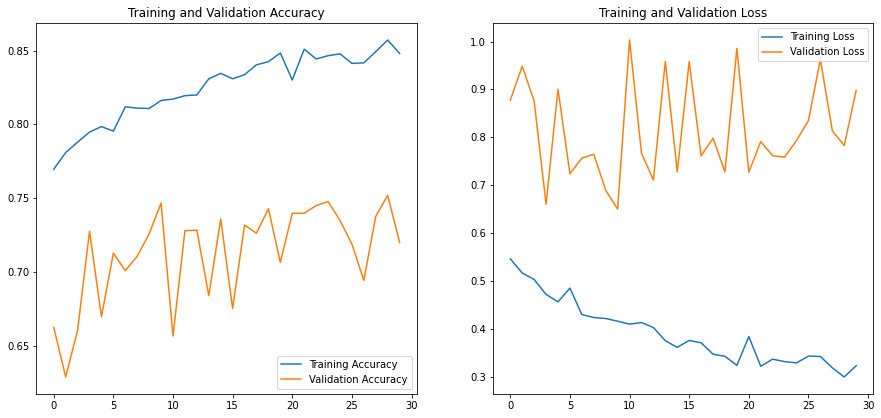

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
CNN_model_predict2 = model.predict(X_test)

In [ ]:
test_cnn_loss, test_cnn_acc = model3.evaluate(X_test, Y_test_ohe, verbose = 2)
print("\nTest accuracy : ", test_cnn_acc, " Test loss : ", test_cnn_loss)

4/4 - 2s - loss: 1.5378 - accuracy: 0.6900 - 2s/epoch - 481ms/step

Test accuracy :  0.6899999976158142  Test loss :  1.5377869606018066


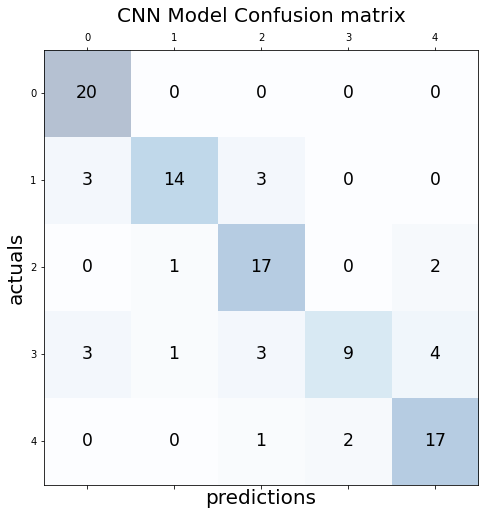

In [ ]:
import sklearn
cnn_y_pred2 = np.argmax(CNN_model_predict2, axis=1)
cnn_y_test = Y_test

confusion_matrix_cnn2 = sklearn.metrics.confusion_matrix(y_pred = cnn_y_pred2, y_true = cnn_y_test)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(confusion_matrix_cnn2, cmap=plt.cm.Blues, alpha=.3)
for i in range(confusion_matrix_cnn2.shape[0]):
  for j in range(confusion_matrix_cnn2.shape[1]):
    ax.text(x=j, y=i, s = confusion_matrix_cnn2[i, j], va="center", ha="center", size = "xx-large")
plt.xlabel("predictions", fontsize=20)
plt.ylabel("actuals", fontsize=20)
plt.title("CNN Model Confusion matrix", fontsize = 20)
plt.show()

#VGG16

In [45]:
base_model4 = keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(img_size,img_size,3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

base_model4.trainable = False

model4 = Sequential([
    


   base_model4,

    Flatten(),

    Dense(800 , activation='relu'),
        
    Dense(5 , activation = 'softmax'),
])

model4.summary()








58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 800)               1639200   
                                                                 
 dense_5 (Dense)             (None, 5)                 4005      
                                                                 
Total params: 16,357,893
Trainable params: 1,643,205
Non-trainable params: 14,714,688
_________________________________________________________________


In [46]:
model4.compile('adam' , loss='categorical_crossentropy' , metrics = ['accuracy'])

In [47]:
history = model4.fit(X_train_normal , Y_train_ohe , epochs=30 , validation_data= (X_validation_normal , Y_validation_ohe) )

Epoch 1/30
384/384 [==============================] - 12s 29ms/step - loss: 1.0341 - accuracy: 0.5882 - val_loss: 0.8379 - val_accuracy: 0.6684
Epoch 2/30
384/384 [==============================] - 10s 26ms/step - loss: 0.7801 - accuracy: 0.6830 - val_loss: 0.7913 - val_accuracy: 0.6841
Epoch 3/30
384/384 [==============================] - 10s 26ms/step - loss: 0.6833 - accuracy: 0.7253 - val_loss: 0.6876 - val_accuracy: 0.7201
Epoch 4/30
384/384 [==============================] - 11s 28ms/step - loss: 0.6136 - accuracy: 0.7518 - val_loss: 0.7333 - val_accuracy: 0.7021
Epoch 5/30
384/384 [==============================] - 11s 28ms/step - loss: 0.5671 - accuracy: 0.7621 - val_loss: 0.6535 - val_accuracy: 0.7332
Epoch 6/30
384/384 [==============================] - 11s 27ms/step - loss: 0.5222 - accuracy: 0.7791 - val_loss: 0.5671 - val_accuracy: 0.7701
Epoch 7/30
384/384 [==============================] - 11s 28ms/step - loss: 0.4846 - accuracy: 0.7958 - val_loss: 0.6356 - val_accuracy:

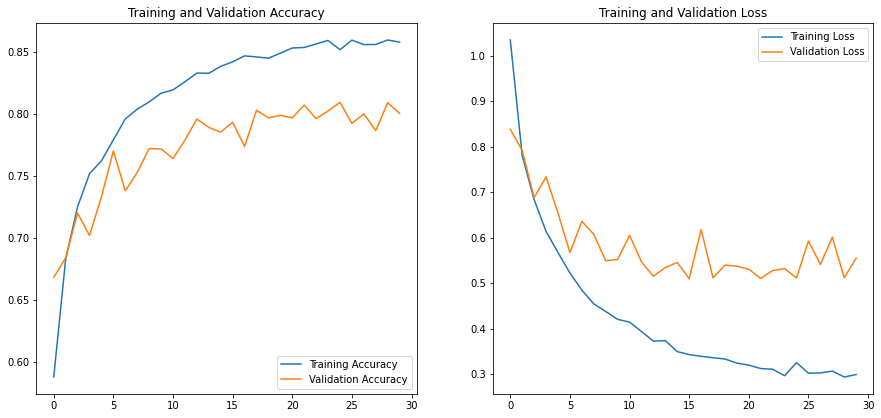

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
CNN_model_predict2 = model4.predict(X_test)

In [55]:
test_cnn_loss, test_cnn_acc = model4.evaluate(X_test, Y_test_ohe, verbose = 2)
print("\nTest accuracy : ", test_cnn_acc, " Test loss : ", test_cnn_loss)

4/4 - 0s - loss: 1.3072 - accuracy: 0.7600 - 108ms/epoch - 27ms/step

Test accuracy :  0.7599999904632568  Test loss :  1.3071696758270264


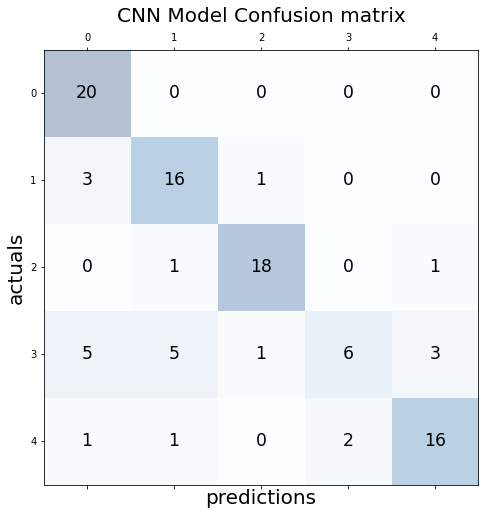

In [56]:
import sklearn
cnn_y_pred2 = np.argmax(CNN_model_predict2, axis=1)
cnn_y_test = Y_test

confusion_matrix_cnn2 = sklearn.metrics.confusion_matrix(y_pred = cnn_y_pred2, y_true = cnn_y_test)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(confusion_matrix_cnn2, cmap=plt.cm.Blues, alpha=.3)
for i in range(confusion_matrix_cnn2.shape[0]):
  for j in range(confusion_matrix_cnn2.shape[1]):
    ax.text(x=j, y=i, s = confusion_matrix_cnn2[i, j], va="center", ha="center", size = "xx-large")
plt.xlabel("predictions", fontsize=20)
plt.ylabel("actuals", fontsize=20)
plt.title("CNN Model Confusion matrix", fontsize = 20)
plt.show()

In [58]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True)
a =  kfold.split(X_train, Y_train)
i , j  = a.

<generator object _BaseKFold.split at 0x7ff0ce5afe50>

In [ ]:
# Merge inputs and targets
inputs = np.concatenate((X_train_normal,X_validation_normal ), axis=0)
targets = np.concatenate((Y_train_ohe, Y_validation_ohe), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)